In [1]:
# Notebook for testing re-derivation of the MIRI dither sequences

In [8]:
import os as os
import numpy as np
from numpy.testing import utils
from numpy.testing import assert_allclose
import pdb as pdb

import matplotlib as mpl
import matplotlib.pyplot as plt

data_dir=os.path.expandvars('$MIRICOORD_DATA_DIR')
import miricoord.miricoord.mrs.mrs_tools as mrst
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [3]:
mrst.set_toolversion('cdp6')
mrst.version()

'cdp6'

In [4]:
# Get the field boundaries from the distortion files, along with the Ch1A alpha-beta
import miricoord.miricoord.mrs.makesiaf.makesiaf_mrs as makesiaf
values1A=makesiaf.create_siaf_oneband('1A')
values1B=makesiaf.create_siaf_oneband('1B')
values1C=makesiaf.create_siaf_oneband('1C')

values2A=makesiaf.create_siaf_oneband('2A')
values2B=makesiaf.create_siaf_oneband('2B')
values2C=makesiaf.create_siaf_oneband('2C')

values3A=makesiaf.create_siaf_oneband('3A')
values3B=makesiaf.create_siaf_oneband('3B')
values3C=makesiaf.create_siaf_oneband('3C')

values4A=makesiaf.create_siaf_oneband('4A')
values4B=makesiaf.create_siaf_oneband('4B')
values4C=makesiaf.create_siaf_oneband('4C')

In [7]:
values1A['inscr_v2ref'],values1B['inscr_v2ref']

(-503.65447214471345, -503.6557850020334)

In [260]:
# Work on the Ch1 dithers
# Across-slice offsets.  11/2, 7/2, 5/2, 3/2 the Ch1/2/3/4 slice width is about 0.968 arcsec.

# Ch1 pattern
psize1=0.196
psize=0.196
swidth1=0.176
swidth=0.176

along=10.5*psize
ashort=0.5*psize
astart=-5.5*psize1
blong=5.5*swidth1
bshort=0.5*swidth
bstart=3*swidth1

In [261]:
slicewidth*np.array([11/2.,7/2.,5/2.,3/2.])

array([0.968 , 0.9695, 0.9675, 0.9675])

In [262]:
print(psize*5.0)

0.98


In [263]:
pattern_alpha=np.array([0,along,along+ashort,ashort,along+ashort,ashort,0,along])+astart

In [264]:
pattern_beta=np.array([blong+bshort,bshort,0,blong,blong+bshort,bshort,0,blong])-blong-bshort+bstart

In [265]:
pattern_alpha

array([-1.078,  0.98 ,  1.078, -0.98 ,  1.078, -0.98 , -1.078,  0.98 ])

In [266]:
pattern_beta

array([ 0.528, -0.44 , -0.528,  0.44 ,  0.528, -0.44 , -0.528,  0.44 ])

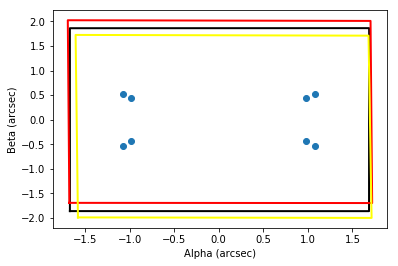

In [136]:
plt.plot(alpha_1A,beta_1A,color='#000000',linewidth=2)
plt.plot(alpha_1B,beta_1B,color='#ff0000',linewidth=2)
plt.plot(alpha_1C,beta_1C,color='#ffff00',linewidth=2)
#plt.plot(values['inscr_alpharef'],values['inscr_betaref'],color='#000000',marker='x',markersize=10,mew=2)
plt.xlabel('Alpha (arcsec)')
plt.ylabel('Beta (arcsec)')
plt.plot(pattern_alpha,pattern_beta,'o')

In [137]:
np.mean(val_beta)

2.7755575615628914e-17

In [267]:
pattern_v2,pattern_v3=mrst.abtov2v3(pattern_alpha,pattern_beta,'1A')

In [268]:
np.mean(pattern_v2),np.mean(pattern_v3)

(-503.65447214471345, -318.742450697324)

In [270]:
values1A['inscr_v2ref'],values1A['inscr_v3ref']

(-503.65447214471345, -318.742450697324)

In [271]:
pattern_v2

array([-504.79319265, -502.62694141, -502.51825132, -504.68389658,
       -502.66323941, -504.5590964 , -504.6432052 , -502.74795419])

In [138]:
# Channel 2 pattern

In [242]:
psize1=0.196
psize=0.196
swidth1=0.176
swidth=0.277

along=10.5*psize
ashort=0.5*psize
astart=-5.5*psize1
blong=16.5*swidth1
bshort=0.5*swidth
bstart=9*swidth1

In [243]:
pattern_alpha=np.array([0,along,along+ashort,ashort,along+ashort,ashort,0,along])+astart

In [244]:
pattern_beta=np.array([blong+bshort,bshort,0,blong,blong+bshort,bshort,0,blong])-blong-bshort+bstart

In [245]:
pattern_alpha

array([-1.078,  0.98 ,  1.078, -0.98 ,  1.078, -0.98 , -1.078,  0.98 ])

In [246]:
pattern_beta

array([ 1.584 , -1.32  , -1.4585,  1.4455,  1.584 , -1.32  , -1.4585,
        1.4455])

In [157]:
pattern_v2,pattern_v3=mrst.abtov2v3(pattern_alpha,pattern_beta,'1A')

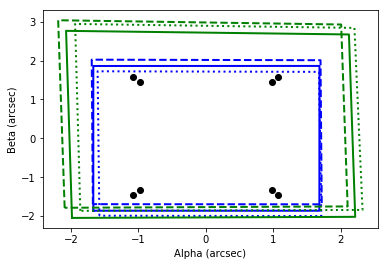

In [156]:
plt.plot(alpha_1A,beta_1A,color='b',linewidth=2)
plt.plot(alpha_1B,beta_1B,'--',color='b',linewidth=2)
plt.plot(alpha_1C,beta_1C,':',color='b',linewidth=2)

plt.plot(alpha_2A,beta_2A,color='g',linewidth=2)
plt.plot(alpha_2B,beta_2B,'--',color='g',linewidth=2)
plt.plot(alpha_2C,beta_2C,':',color='g',linewidth=2)

#plt.plot(values['inscr_alpharef'],values['inscr_betaref'],color='#000000',marker='x',markersize=10,mew=2)
plt.xlabel('Alpha (arcsec)')
plt.ylabel('Beta (arcsec)')
plt.plot(pattern_alpha,pattern_beta,'o',color='black')

(-325.8, -313.8)

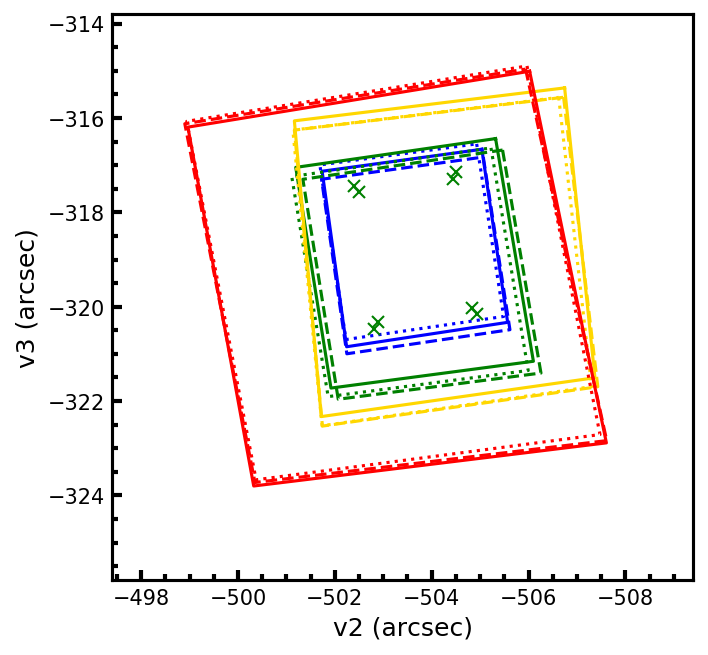

In [216]:
plt.figure(figsize=(5,5),dpi=150)
mpl.rcParams['axes.linewidth'] = 1.5
ax = plt.gca() #for each axis or whichever axis you want you should
ax.minorticks_on()
ax.tick_params(which='minor', length=3, width=2, direction='in')
ax.tick_params(which='major', length=5, width=2, direction='in')
 
plt.plot(values1A['inscr_v2_corners'],values1A['inscr_v3_corners'],color='b',linewidth=1.5)
plt.plot(values1B['inscr_v2_corners'],values1B['inscr_v3_corners'],'--',color='b',linewidth=1.5)
plt.plot(values1C['inscr_v2_corners'],values1C['inscr_v3_corners'],':',color='b',linewidth=1.5)

plt.plot(values2A['inscr_v2_corners'],values2A['inscr_v3_corners'],color='g',linewidth=1.5)
plt.plot(values2B['inscr_v2_corners'],values2B['inscr_v3_corners'],'--',color='g',linewidth=1.5)
plt.plot(values2C['inscr_v2_corners'],values2C['inscr_v3_corners'],':',color='g',linewidth=1.5)

plt.plot(values3A['inscr_v2_corners'],values3A['inscr_v3_corners'],color='gold',linewidth=1.5)
plt.plot(values3B['inscr_v2_corners'],values3B['inscr_v3_corners'],'--',color='gold',linewidth=1.5)
plt.plot(values3C['inscr_v2_corners'],values3C['inscr_v3_corners'],':',color='gold',linewidth=1.5)

plt.plot(values4A['inscr_v2_corners'],values4A['inscr_v3_corners'],color='r',linewidth=1.5)
plt.plot(values4B['inscr_v2_corners'],values4B['inscr_v3_corners'],'--',color='r',linewidth=1.5)
plt.plot(values4C['inscr_v2_corners'],values4C['inscr_v3_corners'],':',color='r',linewidth=1.5)

#plt.plot(values['inscr_alpharef'],values['inscr_betaref'],color='#000000',marker='x',markersize=10,mew=2)
plt.xlabel('v2 (arcsec)',fontsize=12)
plt.ylabel('v3 (arcsec)',fontsize=12)
plt.plot(pattern_v2,pattern_v3,'x',color='g')
plt.xlim(-497.4,-509.4)
plt.ylim(-325.8,-313.8)

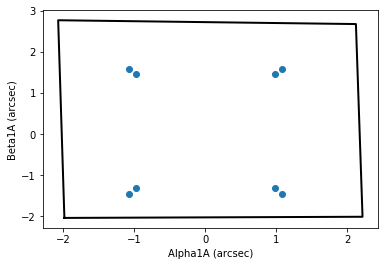

In [96]:
acorn,bcorn=mrst.v2v3toab(values['inscr_v2_corners'],values['inscr_v3_corners'],'1A')
plt.plot(acorn,bcorn,color='#000000',linewidth=2)
plt.xlabel('Alpha1A (arcsec)')
plt.ylabel('Beta1A (arcsec)')
plt.plot(pattern_alpha,pattern_beta,'o')

In [88]:
pattern_alpha

array([-1.078,  0.98 ,  1.078, -0.98 ,  1.078, -0.98 , -1.078,  0.98 ])

In [89]:
pattern_beta

array([ 1.584 , -1.32  , -1.4585,  1.4455,  1.584 , -1.32  , -1.4585,
        1.4455])

In [90]:
np.mean(pattern_alpha),np.mean(pattern_beta)

(2.7755575615628914e-17, 0.06274999999999986)

In [ ]:
# Ch2 pattern are centered wrt Ch1A field?

In [251]:
# Ch3 pattern
psize1=0.196
psize=0.244
swidth1=0.176
swidth=0.387

along=16.5*psize
ashort=0.5*psize
astart=-12.5*psize1
blong=16.5*swidth1
bshort=0.5*swidth
bstart=12.6*swidth1

In [252]:
pattern_alpha=np.array([0,along,along+ashort,ashort,along+ashort,ashort,0,along])+astart
pattern_beta=np.array([blong+bshort,bshort,0,blong,blong+bshort,bshort,0,blong])-blong-bshort+bstart

In [253]:
pattern_alpha

array([-2.45 ,  1.576,  1.698, -2.328,  1.698, -2.328, -2.45 ,  1.576])

In [250]:
pattern_beta

array([ 2.2176, -0.6864, -0.8799,  2.0241,  2.2176, -0.6864, -0.8799,
        2.0241])

In [254]:
# Ch4 pattern
psize1=0.196
psize=0.273
swidth1=0.176
swidth=0.645

along=17.5*psize
ashort=0.5*psize
astart=-10*psize1
blong=27.5*swidth1
bshort=0.5*swidth
bstart=18*swidth1

In [255]:
pattern_alpha=np.array([0,along,along+ashort,ashort,along+ashort,ashort,0,along])+astart
pattern_beta=np.array([blong+bshort,bshort,0,blong,blong+bshort,bshort,0,blong])-blong-bshort+bstart

In [256]:
pattern_alpha

array([-1.96  ,  2.8175,  2.954 , -1.8235,  2.954 , -1.8235, -1.96  ,
        2.8175])

In [257]:
pattern_beta

array([ 3.168 , -1.672 , -1.9945,  2.8455,  3.168 , -1.672 , -1.9945,
        2.8455])

In [272]:
# This is all assuming that the 1A alpha/beta to v2/v3 conversion is well behaved outside the 1A field...

In [278]:
alpha=np.array([-4,-3,-2,-1,0,1,2,3,4,-4,-3,-2,-1,0,1,2,3,4,-4,-3,-2,-1,0,1,2,3,4,-4,-3,-2,-1,0,1,2,3,4,-4,-3,-2,-1,0,1,2,3,4,-4,-3,-2,-1,0,1,2,3,4,-4,-3,-2,-1,0,1,2,3,4,-4,-3,-2,-1,0,1,2,3,4,-4,-3,-2,-1,0,1,2,3,4])
beta=np.array([-4,-4,-4,-4,-4,-4,-4,-4,-4,-3,-3,-3,-3,-3,-3,-3,-3,-3,-2,-2,-2,-2,-2,-2,-2,-2,-2,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4])

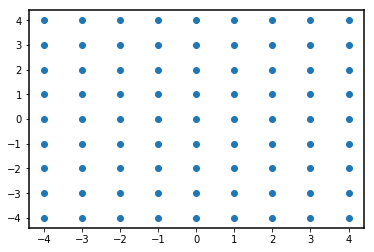

In [279]:
plt.plot(alpha,beta,'o')

In [280]:
v2,v3=mrst.abtov2v3(alpha,beta,'1A')

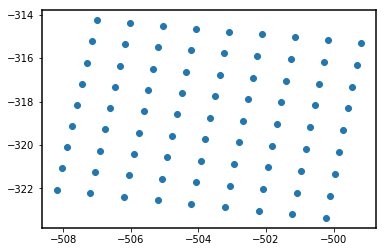

In [281]:
plt.plot(v2,v3,'o')

In [282]:
alpha,beta=-2.45,2.218

In [284]:
v2,v3=mrst.abtov2v3(alpha,beta,'1A')
a1,b1=mrst.v2v3toab(v2,v3,'3A')
a1/0.244,b1/.387

(-7.552179032500806, 5.262194582174606)